By this, you should have ``pandas``, ``numpy`` etc. installed. For this, we will install ``polyglot`` to analyze the text. The installation instructions apply for Linux.

```
$ sudo apt-get install libicu-dev
$ pip3 install --user polyglot morfessor pyicu pycld2
```

Install sentiment analysis and embeddings for Finnish language -- this might take some time:

```
$ python3
> from polyglot.download import downloader
> downloader.download("embeddings2.fi")
> downloader.download("sentiment2.fi")
```

To get rid of some annoying division by zero errors, we patch ``polyglot``. The install location can vary, but for example in my install, I'll open ``~/.local/lib/python3.5/site-packages/polyglot/text.py`` and change line 96 - the ``return`` of ``polarity`` function - to

```return sum(scores) / float(len(scores)) if len(scores) > 0 else np.nan```

and save.

The tweet file should be a line delimited JSON file - for testing it's better to create a smaller test data set. Add filename in ``FILENAME``, but _don't_ keep it in the directory that's going to Git, or add it to ``.gitignore`` if you insist.

In [2]:
import json
import pandas as pd 
import re 
import numpy as np
import matplotlib.pyplot as plt

FILENAME = "TWEET_FILE"

tweetfile = open(FILENAME, "r").read()
tweets = [json.loads(str(line)) for line in tweetfile.strip().split('\n')]

In [3]:
df = pd.DataFrame(tweets)
df.sort_values("created_at")

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
118915,None,None,Mon Oct 15 00:00:00 +0000 2018,"[0, 140]","{'urls': [], 'symbols': [], 'user_mentions': [...",NaN,0,False,"RT @overtflow: as always, I’m hooking my follo...",None,...,NaN,NaN,NaN,NaN,2985,False,"{'in_reply_to_status_id_str': None, 'retweet_c...","<a href=""https://gleam.io"" rel=""nofollow"">Glea...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118914,None,None,Mon Oct 15 00:00:00 +0000 2018,"[0, 140]","{'urls': [], 'symbols': [], 'user_mentions': [...",NaN,0,False,"RT @joshhart: Giving away a new Xbox One X, CO...",None,...,NaN,NaN,NaN,NaN,56547,False,"{'in_reply_to_status_id_str': None, 'retweet_c...","<a href=""https://mobile.twitter.com"" rel=""nofo...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118913,None,None,Mon Oct 15 00:00:00 +0000 2018,"[0, 31]","{'urls': [], 'symbols': [], 'user_mentions': [...",NaN,0,False,Xbox one d1v1n37 black ops 4 ‼️,None,...,NaN,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118912,None,None,Mon Oct 15 00:00:01 +0000 2018,"[0, 140]","{'urls': [], 'symbols': [], 'user_mentions': [...",NaN,0,False,"RT @joshhart: Giving away a new Xbox One X, CO...",None,...,NaN,NaN,NaN,NaN,56547,False,"{'in_reply_to_status_id_str': None, 'retweet_c...","<a href=""http://twitter.com/#!/download/ipad"" ...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118911,None,None,Mon Oct 15 00:00:02 +0000 2018,"[0, 134]",{'urls': [{'expanded_url': 'https://www.twitch...,NaN,0,False,RT @Axe420Tribal: Check out my broadcast from ...,None,...,False,NaN,NaN,NaN,1,False,"{'in_reply_to_status_id_str': None, 'retweet_c...","<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118910,None,None,Mon Oct 15 00:00:02 +0000 2018,"[0, 125]",{'urls': [{'expanded_url': 'https://www.trueac...,NaN,2,False,I won the Welcome to the Club achievement in C...,None,...,False,NaN,NaN,NaN,0,False,NaN,"<a href=""https://www.trueachievements.com"" rel...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118908,None,None,Mon Oct 15 00:00:03 +0000 2018,"[0, 140]","{'urls': [], 'symbols': [], 'user_mentions': [...",NaN,0,False,"RT @joshhart: Giving away a new Xbox One X, CO...",None,...,NaN,NaN,NaN,NaN,56547,False,"{'in_reply_to_status_id_str': None, 'retweet_c...","<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118909,None,None,Mon Oct 15 00:00:03 +0000 2018,"[0, 103]","{'urls': [], 'media': [{'expanded_url': 'https...",{'media': [{'expanded_url': 'https://twitter.c...,0,False,RT @DailyRapFacts: Call Of Duty sent Lil Yacht...,None,...,False,NaN,NaN,NaN,961,False,"{'in_reply_to_status_id_str': None, 'retweet_c...","<a href=""http://twitter.com/download/iphone"" r...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118907,None,None,Mon Oct 15 00:00:04 +0000 2018,"[0, 115]",{'urls': [{'expanded_url': 'http://youtu.be/BK...,NaN,0,False,PISTOL ONLY CHALLENgE! CRAZY OUT COME... (Call...,None,...,False,NaN,NaN,NaN,0,False,NaN,"<a href=""https://www.google.com/"" rel=""nofollo...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...
118906,None,None,Mon Oct 15 00:00:04 +0000 2018,"[0, 132]",{'urls': [{'expanded_url': 'http://youtu.be/Ot...,NaN,0,False,How To Upgrade The Kraken w/ ALL 4 Elements in...,None,...,False,NaN,NaN,NaN,0,False,NaN,"<a href=""https://www.google.com/"" rel=""nofollo...",False,{'profile_image_url': 'http://pbs.twimg.com/pr...


In [58]:
df.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'metadata', 'place', 'possibly_sensitive', 'quoted_status',
       'quoted_status_id', 'quoted_status_id_str', 'retweet_count',
       'retweeted', 'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

Let's check for duplicates, based on the tweet id:

In [59]:
ids = set(df.id)
print("Original length: {} Unique ids: {}".format(len(df), len(ids)))

Original length: 150609 Unique ids: 150609


Let's drop the duplicates.

In [4]:
df = df.drop_duplicates(subset=['id'], keep='last')

Let's drop the retweets.

In [5]:
df = df[pd.isnull(df['retweeted_status'])]

We'll define some utility functions to handle the ``polyglot`` errors better, ie. if it can't detect the language or decides to divide by zero. We'll also strip ``@`` from usernames and ``#`` from tags, so they can be detected as entities or just ordinary words -- also we don't need the web links.

In [6]:
from polyglot.detect import Detector
from polyglot.text import Text

def detect_lang(text):
    try:
        return text.language.code
    except:
        return ''
    
def detect_polarity(text):
    try:
        polarity = text.polarity
        
        return polarity
    except:
        return np.nan

def tag_handle_link_strip(text):
    try:
        p = re.sub(r"(\#|\@|https?:\/\/[\w\d./]*.)", "", text)
        return p.strip()
    except:
        return text

def filter_automated_spam(text):
    spams = [
        "I liked a YouTube video",
        "I added a video to a YouTube playlist",
        "I'm now streaming on Twitch",
        "Check out my broadcast"
    ]
    
    return any(spam in text for spam in spams)

We'll apply the strip function to the tweet texts. Then we create ``polyglot.Text`` objects from the stripped texts. We attempt to detect the language and drop those, that aren't English. This will produce a lot of error messages for texts without reliable detection, by the way.

In [7]:
# line.full_text[line.display_text_range[0]:line.display_text_range[1]]
df['stripped_text'] = [tag_handle_link_strip(line.full_text) for idx, line in df.iterrows()]
df['polyglot_text'] = [Text(text) for text in df['stripped_text']]
df['detected_lang'] = df['polyglot_text'].apply(detect_lang)
df = df.drop(df[df['detected_lang'] != 'en'].index)

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to detect the language reliably.
Detector is not able to dete

Tweets tend to include a lot of automatically generated ones from YouTube and Twitch - we can do without them.

In [8]:
df = df.drop(df[df['stripped_text'].apply(filter_automated_spam)].index)

Let's get polarity values from the text objects, and drop those lines without any detected polarity value.

In [9]:
df['polarity'] = [detect_polarity(text) for text in df['polyglot_text']]

df.dropna(subset=['polarity'], inplace=True)
len(df)

NameError: name 'df_polarity' is not defined

Let's plot a histogram of the polarities:

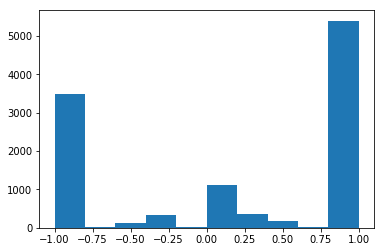

In [10]:
plt.hist(df['polarity']);

#### TODO: dummy the tags only from those that are polarized and analyse

The tags are conveniently stored in the `entities` object. Let's extract them to an array for each line and count them: 

In [14]:
def get_tags(line):
    try:
        entities = line['entities']
        hashtags = entities['hashtags']
        return [e['text'] for e in hashtags]
    except:
        return []

df['tags'] = df.apply(get_tags, axis=1)

from collections import Counter

c = Counter([tag for _, line in df.iterrows() for tag in line.tags])

In [15]:
c.most_common(100)

[('BlackOps4', 490),
 ('twitch', 145),
 ('blackops4', 126),
 ('SupportSmallStreamers', 109),
 ('Blackout', 108),
 ('giveaway', 102),
 ('CallofDutyBlackOps4', 96),
 ('BO4', 77),
 ('win', 65),
 ('gaming', 62),
 ('CallOfDuty', 59),
 ('callofduty', 54),
 ('BlackOps', 49),
 ('CODNATION', 49),
 ('blackout', 48),
 ('Twitch', 45),
 ('streaming', 45),
 ('bo4', 42),
 ('SmallStreamersConnect', 39),
 ('live', 38),
 ('PS4live', 35),
 ('twitchstreamer', 34),
 ('CallofDuty', 32),
 ('gamer', 31),
 ('youtube', 30),
 ('hostme', 30),
 ('supportsmallstreamers', 29),
 ('cod', 28),
 ('streamer', 28),
 ('Blackops4', 26),
 ('ps4', 25),
 ('XboxOne', 25),
 ('twitchtv', 25),
 ('PS4', 25),
 ('xbox', 24),
 ('smallstreamer', 23),
 ('news', 20),
 ('BlackOps4zombies', 19),
 ('stream', 19),
 ('SupportSmallerStreamers', 19),
 ('PS4share', 19),
 ('livestream', 18),
 ('COD', 18),
 ('treyarch', 18),
 ('fortnite', 17),
 ('SupportSmallStreams', 17),
 ('like', 17),
 ('subscribe', 17),
 ('zombies', 16),
 ('Xbox', 16),
 ('blac

Let's create dummy values from the tags, so that for each tag there is a column in the table and a value of 1 or 0 depending if tweet has that tag.

In [18]:
dummy = pd.get_dummies([tag for tags in df['tags'] for tag in tags]).rename(columns=lambda l: 'tag_' + str(l))

df = pd.concat([df, dummy], axis=1)

df.dropna(subset=['full_text'], inplace=True)

Next, we will create a dictionary of with each tag as key and average polarity as value.

In [113]:
from math import isnan

def strip_tag(tag):
    return tag[4:]

polarity_per_tag = {tag:df[df[tag] == 1]['polarity'].mean() for tag in dummy.columns}
polarity_per_tag = {strip_tag(tag): polarity for tag, polarity in polarity_per_tag.items() if not isnan(polarity)}

Let's bunch the tags to buckets based on their polarity:

In [114]:
polarity_df = pd.DataFrame.from_dict(polarity_per_tag, orient="index")
polarity_grouped = polarity_df.groupby(0).groups
polarity_grouped

{-1.0: Index(['SMDStreams', 'indiegames', 'RegalRC', 'viral', 'WaveformGamingLadies',
        'SupportSmallerStreams', 'finsup', 'tryarch', 'awesomeambience',
        'consolewar', 'playstation', 'tattooedgamer', 'TeamSSG',
        'ImBEAMINkidsbro', 'StillGrindingForSoaR', 'smallstreamersconnect',
        'sugardaddyneeded', 'CODTopPlays', 'memes', '2k19', 'LurkForce',
        'TwitchStreamers', 'Xbox', 'Activision', 'beardedgamer',
        'callofdutyblackops', 'pcsetup', 'TheHypeZone', 'slayer', 'imlive',
        'PathToAffiliate', 'smallyoutubers', 'like', 'rage', 'racine', 'deals',
        'variety', 'SmallYouTuberArmy', 'watch', 'stupid', 'BeSocially',
        'Overwatch', 'xboxone', 'XboxOneX', 'RoadToAffiliate', 'TeamFrog',
        'fitness', 'message', 'codbo4', 'Treyarch', 'please',
        'MissingAllTheFun', 'TeamEmmmmsie', 'FAIL', 'bwnsft', 'huskerrs',
        'xboxonex', 'salty', 'WeAreYourNemesis', 'XboxOne', 'discord',
        'XboxShare', 'twitchkittens', 'graveyard', 